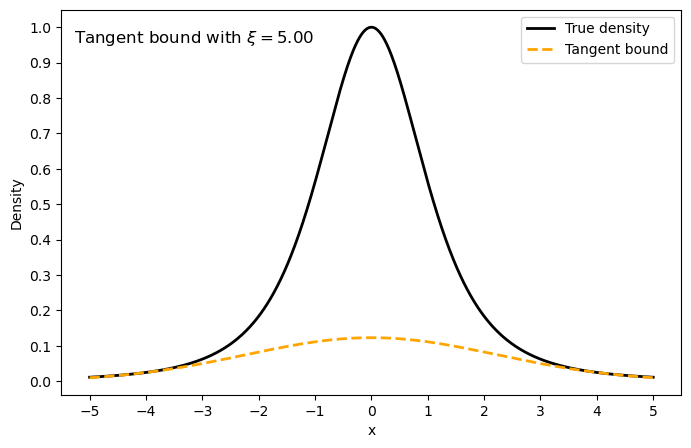

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import MultipleLocator
from IPython.display import HTML

def true_density(x, nu=3):
    return (-(nu + 1) / 2) * np.log(1 + (x ** 2) / nu)

def lower_bound(x, xi, nu=3):
    r_xi = nu / xi + (nu + 1) * (np.log(xi) - np.log(nu / (nu + 1)) - 1)
    r_xi = 0 if xi < nu / (nu + 1) else r_xi
    return -(x ** 2) / (2 * xi) - r_xi / 2

x = np.linspace(-5, 5, 1000)
nu = 3
true = np.exp(true_density(x, nu))
xi_values = np.linspace(0.3, 5.0, 50)

fig, ax = plt.subplots(figsize=(8, 5))
line_true, = ax.plot(x, true, color='black', lw=2, label='True density')
line_bound, = ax.plot([], [], color='orange', lw=2, linestyle='--', label='Tangent bound')
text_label = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

def init():
    line_bound.set_data([], [])
    text_label.set_text('')
    return line_bound, text_label

def update(frame):
    xi = xi_values[frame]
    bound = np.exp(lower_bound(x, xi, nu))
    line_bound.set_data(x, bound)
    text_label.set_text(r"Tangent bound with $\xi={:.2f}$".format(xi))
    return line_bound, text_label

#ax.set_title("Tangent Minorizers to Student's t Likelihood (ν=3)", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("Density")
ax.legend(loc='upper right')
ax.grid(False)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

ani = FuncAnimation(fig, update, frames=len(xi_values), init_func=init, blit=True, repeat=True, interval=300)
HTML(ani.to_jshtml())

ani.save("tangent_bounds.gif", writer="pillow", fps=5)


IndexError: list index out of range

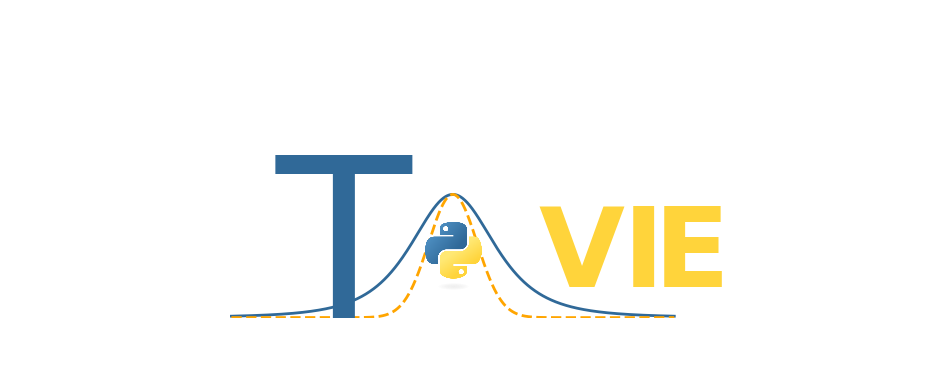

In [62]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from IPython.display import HTML
import matplotlib.image as mpimg
import numpy as np

# ----- Tangent minorizers -----
def true_density(x, nu=3):
    return (-(nu + 1) / 2) * np.log(1 + (x ** 2) / nu)

def lower_bound(x, xi, nu=3):
    r_xi = nu / xi + (nu + 1) * (np.log(xi) - np.log(nu / (nu + 1)) - 1)
    r_xi = 0 if xi < nu / (nu + 1) else r_xi
    return -(x ** 2) / (2 * xi) - r_xi / 2

# ----- Setup grid and density -----
x = np.linspace(-5, 5, 1000)
nu = 3
true = np.exp(true_density(x, nu))
xi_values = np.linspace(0.3, 5.0, 50)

# ----- Set up figure -----
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlim(-10, 11)
ax.set_ylim(0, 2.5)
ax.axis("off")
fig.patch.set_alpha(0.0)  # Transparent background

# ----- Color palette -----
python_blue = "#306998"
python_yellow = "#FFD43B"
tangent_color = "#FFA500"

# ----- Draw bold letters -----
ax.text(-4.0, 0.5, "T", fontsize=160, color=python_blue, ha='left', va='center')
ax.text(2.9, 0.5, "V", fontsize=80, weight='bold', color=python_yellow, ha='center', va='center')
ax.text(4.3, 0.5, "I", fontsize=80, weight='bold', color=python_yellow, ha='center', va='center')
ax.text(5.4, 0.5, "E", fontsize=80, weight='bold', color=python_yellow, ha='center', va='center')

# ----- Python logo overlay for "A" -----
python_logo = mpimg.imread("python_favicon.png")  # Must be transparent PNG
imagebox = OffsetImage(python_logo, zoom=0.15)
ab = AnnotationBbox(imagebox, (0, 0.5), frameon=False)
ax.add_artist(ab)

# ----- Animation lines -----
line_true, = ax.plot(x, true, color=python_blue, lw=2, zorder=1)
line_bound, = ax.plot([], [], color=tangent_color, lw=2, linestyle='--', zorder=2)

def init():
    line_bound.set_data([], [])
    return (line_bound,)

def update(frame):
    xi = xi_values[frame]
    bound = np.exp(lower_bound(x, xi, nu))
    line_bound.set_data(x, bound)
    return (line_bound,)

# ----- Animate -----
ani = FuncAnimation(fig, update, frames=len(xi_values), init_func=init,
                    blit=True, interval=200, repeat=True)

# Inline Jupyter display
HTML(ani.to_jshtml())

# ----- Save transparent GIF -----
writer = PillowWriter(fps=5)
ani.save("TAVIE_animated_logo.gif", writer=writer, dpi=100)

Original size: (640, 213)


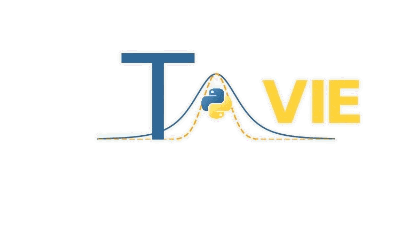

In [66]:
from PIL import Image, ImageSequence
from IPython.display import display, Image as IPyImage

# Load the original GIF
input_path = "logo.gif"
im = Image.open(input_path)

# Get original size and define crop box (adjust as needed)
print("Original size:", im.size)
crop_box = (100, 50, 500, 300)  # (left, top, right, bottom)

# Crop all frames
cropped_frames = []
for frame in ImageSequence.Iterator(im):
    cropped = frame.crop(crop_box)
    cropped_frames.append(cropped.copy())

# Save the cropped GIF
output_path = "TAVIE_cropped.gif"
cropped_frames[0].save(output_path, save_all=True,
                       append_images=cropped_frames[1:],
                       duration=im.info['duration'],
                       loop=0)

# Display the cropped GIF (in Jupyter/IPython)
display(IPyImage(filename=output_path))
